<a href="https://colab.research.google.com/github/ambitious08/git1/blob/main/CutomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
df = pd.read_csv('/content/online-retail-dataset (1).csv')

In [6]:
df = df.dropna(subset=['CustomerID'])
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

<ipython-input-6-3e0d9d3aea1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalSpent'] = df['Quantity'] * df['UnitPrice']


In [7]:
df = df.dropna(subset=['CustomerID'])
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

In [9]:
customer_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Frequency
    'TotalSpent': 'sum'      # Monetary
}).reset_index()

In [10]:
customer_data.columns = ['CustomerID', 'Frequency', 'Monetary']

         CustomerID    Frequency       Monetary
count   3399.000000  3399.000000    3399.000000
mean   15276.817593     4.190644    1496.100233
std     1727.782689     7.045811    5707.990274
min    12346.000000     1.000000   -4287.630000
25%    13785.000000     1.000000     245.865000
50%    15236.000000     2.000000     535.600000
75%    16767.500000     5.000000    1323.700000
max    18287.000000   138.000000  175638.940000


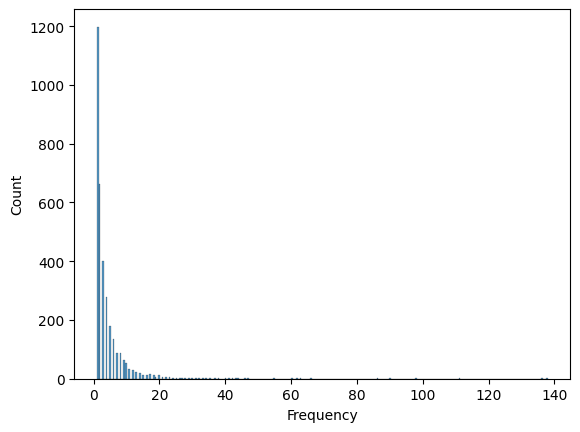

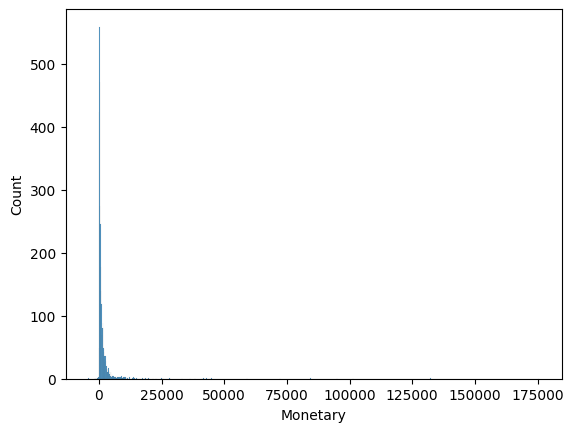

In [11]:
print(customer_data.describe())
sns.histplot(customer_data['Frequency'])
plt.show()
sns.histplot(customer_data['Monetary'])
plt.show()


In [13]:
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Frequency', 'Monetary']])

In [14]:
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(customer_data_pca)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

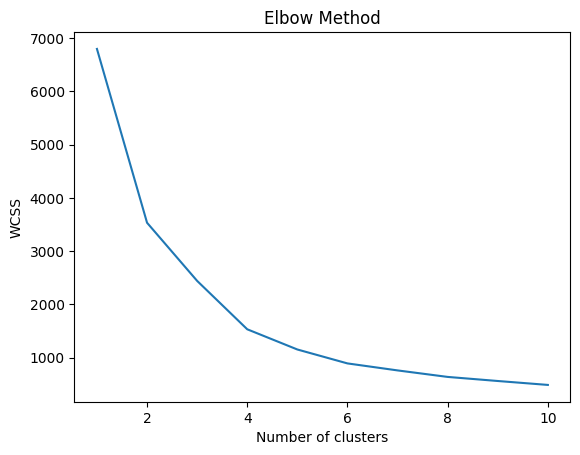

In [16]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [17]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_data_pca)
customer_data['Cluster'] = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


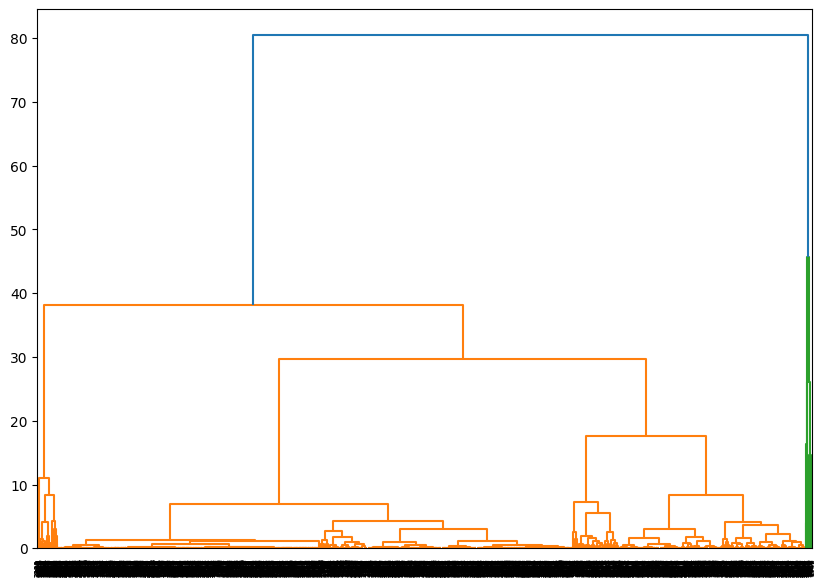

In [18]:
linked = linkage(customer_data_pca, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

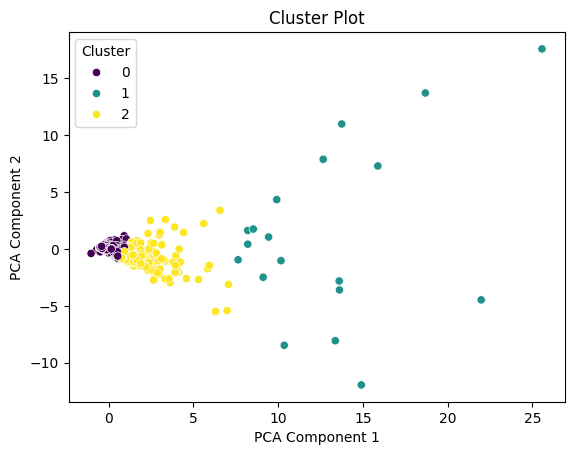

In [19]:
sns.scatterplot(x=customer_data_pca[:,0], y=customer_data_pca[:,1], hue=customer_data['Cluster'], palette='viridis')
plt.title('Cluster Plot')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [20]:
cluster_profile = customer_data.groupby('Cluster').mean()
print(cluster_profile)

# Save the clustered data to a file
customer_data.to_csv('customer_segments.csv', index=False)

           CustomerID  Frequency      Monetary
Cluster                                       
0        15279.020389   2.832431    796.514601
1        15265.105263  62.631579  58506.395263
2        15249.049793  17.273859   6113.542946
